# DataViz com Preço de Combustíveis Ofertados nos Postos Brasileiros

### Fonte de Dados

Os dados estão disponíveis na ANP: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Utilizou-se os últimos 5 anos da base de dados.

### Banco de Dados

O PostgreSQL foi o banco de dados utilizado. A tabela abaixo foi criada para comportar os dados.


```sql
CREATE TABLE anp.preco_combustivel(
	regiao 				varchar(255)
	,estado				varchar(255)
	,municipio			varchar(255)
	,revenda			varchar(255)
	,cnpj				varchar(255)
	,nome_rua			varchar(255)	
	,numero_rua			varchar(255)
	,complemento		varchar(255)
	,bairro				varchar(255)
	,cep				varchar(255)
	,produto			varchar(255)
	,data_coleta		date
	,valor_venda		float
	,unidade_medida		varchar(255)
	,bandeira			varchar(255)

)
```

Os dados foram inseridos por meio da ferramenta de ETL KNIME.

O fluxo do ETL foi construído na aplicação conforme ilustrado:

<img src = 'img/etl_knime.png'><br/>

### EDA

Bibliotecas

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

Conexão com banco de dados

In [3]:
conn = ps.connect(
    dbname = 'postech',
    user ='postgres',
    password = 'postgres',
    host = 'localhost',
    port = '5432' 
)

Importação de dados

In [4]:
sql = 'SELECT * FROM anp.preco_combustivel'

In [5]:
df = sqlio.read_sql_query(sql, conn) #importando dados do PostgreSQL para o DataFrame pandas

In [6]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GNV,2018-01-02,2.370,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,DIESEL S10,2018-01-02,3.240,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,ETANOL,2018-01-02,2.930,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GASOLINA,2018-01-02,3.620,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2018-01-02,2.699,R$ / m³,BRANCA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 503.7+ MB


In [8]:
df.shape

(4401370, 15)

Tratamento de dados

In [9]:
#transformando tipo do campo de data
df['data_coleta'] = pd.to_datetime(df['data_coleta'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 503.7+ MB


In [10]:
#verificando dados nulos
df.isnull().sum()

regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           2775
complemento       3354329
bairro              13416
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

In [11]:
#selecionando colunas de interesse
colunas = ['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda']
df_anp = df[colunas]
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699


In [12]:
#extraindo colunas com ano e mes
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


Estatísticas básicas

In [13]:
df_anp['valor_venda'].describe().round(2) #estatísticas de todos os combustíveis

count    4401370.00
mean           4.48
std            1.30
min            1.76
25%            3.52
50%            4.19
75%            5.20
max            9.65
Name: valor_venda, dtype: float64

Quais os tipos de produtos comercializados?

In [14]:
print(f'Os produtos comercializados são: {df_anp["produto"].unique()}')

Os produtos comercializados são: ['GNV' 'DIESEL S10' 'ETANOL' 'GASOLINA' 'DIESEL' 'GASOLINA ADITIVADA']


Qual é o período da base?

In [15]:
print(f'Os anos da base são: {df_anp["ano"].unique()}')

Os anos da base são: [2018 2019 2020 2021 2022]


Descobrindo valores mínimos, máximos e médios dos produtos por ano

In [16]:
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']]

In [17]:
df_anp_valor.groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.80  5.20  3.50
                   2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
DIESEL S10         2018        2.84  5.30  3.59
                   2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
ETANOL             2018        1.90  4.98  3.13
                   2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
GASOLINA           2018        3.37  6.29  4.45
                   2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
GNV                2018        1.76  4.10  2.73
                   2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04

Descobrindo valores mínimos, máximos e médios dos produtos por ano

In [18]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado', 'valor_venda']]

In [19]:
df_anp_valor_estado.groupby(['produto', 'ano', 'estado']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2018 AC            3.38  4.89  4.29
             AL            3.10  4.23  3.60
             AM            3.09  4.49  3.63
             AP            3.29  4.51  3.88
             BA            2.99  5.20  3.51
...                         ...   ...   ...
GNV     2022 RN            4.11  4.99  4.50
             RS            4.59  6.89  5.88
             SC            4.00  6.89  5.50
             SE            4.47  5.49  4.99
             SP            3.59  6.99  5.22

[727 rows x 3 columns]

Descobrindo a quantidade de bandeiras por produto nos períodos

In [20]:
df_anp_bandeira = df_anp[['ano', 'bandeira', 'produto']]

In [21]:
df_anp_bandeira.groupby(['ano', 'produto']).bandeira.nunique()

ano   produto           
2018  DIESEL                64
      DIESEL S10            66
      ETANOL                66
      GASOLINA              66
      GNV                   24
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                54
      DIESEL S10            54
      ETANOL                55
      GASOLINA              55
      GASOLINA ADITIVADA    54
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
Name: bandeira, dtype: int64

Descobrindo a quantidade de bandeiras por produto nos períodos por estado

In [22]:
df_anp_bandeira_estado = df_anp[['ano', 'bandeira', 'produto', 'estado']]

In [23]:
df_anp_bandeira_estado.groupby(['ano', 'produto', 'estado']).bandeira.nunique()

ano   produto  estado
2018  DIESEL   AC         6
               AL         7
               AM         9
               AP         3
               BA        10
                         ..
2022  GNV      RN         5
               RS         6
               SC         8
               SE         5
               SP         7
Name: bandeira, Length: 727, dtype: int64

Data viz

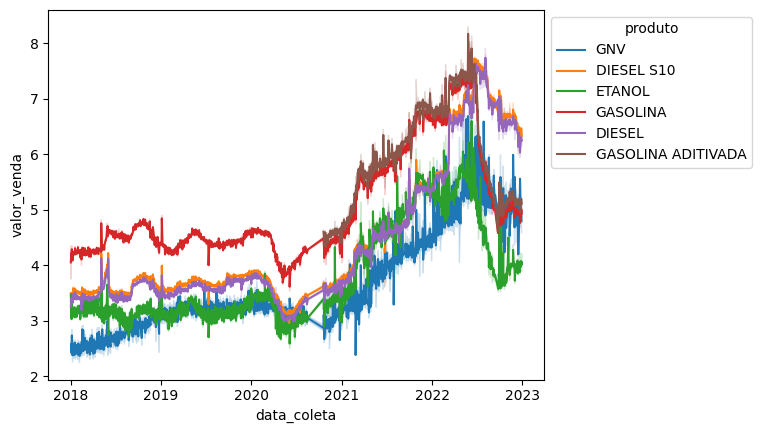

In [24]:
ax = sns.lineplot(
    data=df_anp,
    x='data_coleta',
    y='valor_venda',
    hue='produto'
)

sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

Seguimentando dataset por produto

In [25]:
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']

Funções para o dataviz

In [26]:
def plota_boxplot_2v(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax=sns.boxplot(data=dataset, x=x ,y=y)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)

In [27]:
def plota_boxplot_geral(labely, y, dataset):
    ax=sns.boxplot(data=dataset, y=y)
    ax.set_ylabel(labely, fontsize=14)
    ax.figure.set_size_inches(6, 6)

Analisando combustiveis

Gasolina comum

In [28]:
print('Gasolina comum')
gasolina.valor_venda.describe().round(2)

Gasolina comum


count    1247070.00
mean           4.99
std            1.01
min            2.87
25%            4.29
50%            4.65
75%            5.50
max            8.99
Name: valor_venda, dtype: float64

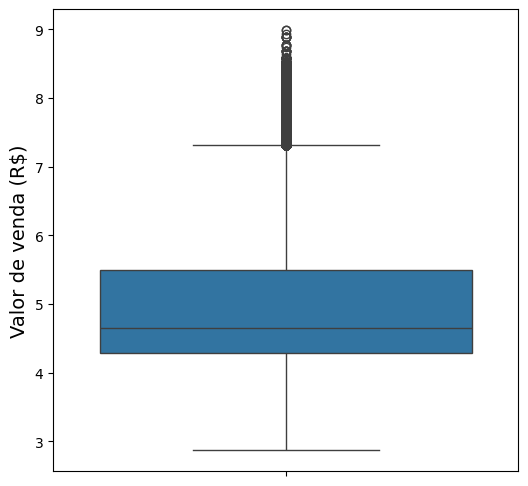

In [29]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', gasolina)

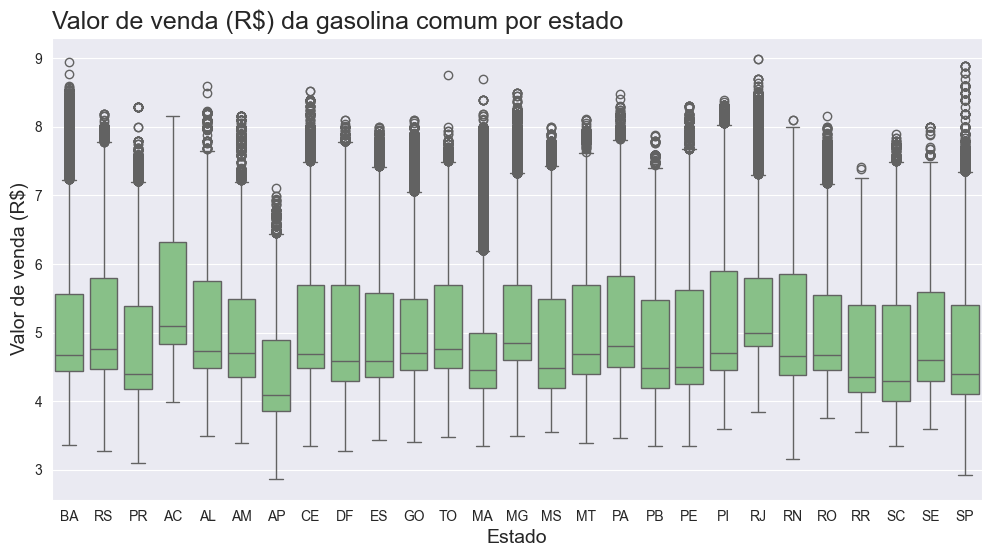

In [30]:
plota_boxplot_2v(
    'Valor de venda (R$) da gasolina comum por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    gasolina
)

Gasolina aditivada

In [31]:
print('Gasolina aditivada')
gasolina_aditivada.valor_venda.describe().round(2)

Gasolina aditivada


count    340489.00
mean          6.19
std           0.94
min           3.46
25%           5.49
50%           6.19
75%           6.92
max           9.28
Name: valor_venda, dtype: float64

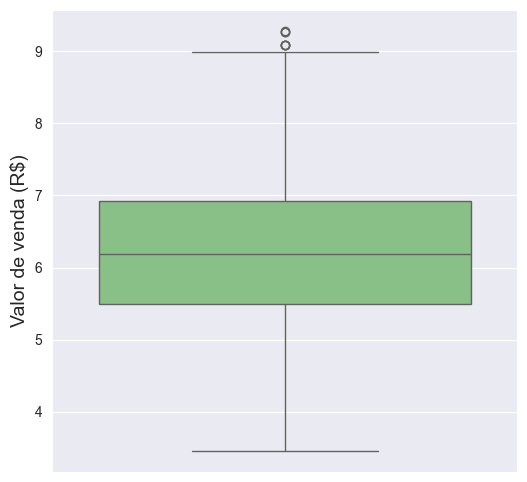

In [32]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', gasolina_aditivada)

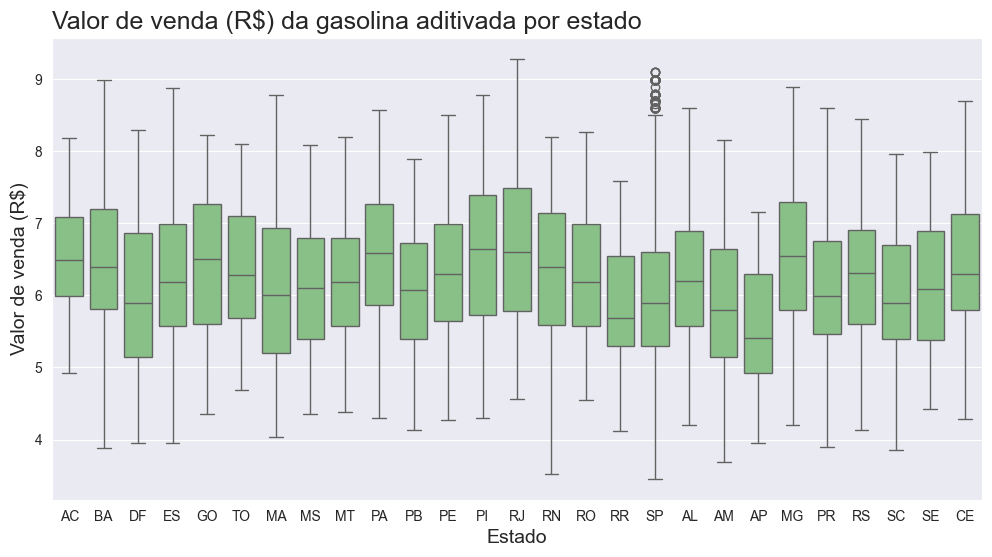

In [33]:
plota_boxplot_2v(
    'Valor de venda (R$) da gasolina aditivada por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    gasolina_aditivada
)

Diesel s10

In [34]:
print('Diesel s10')
diesel_s10.valor_venda.describe().round(2)

Diesel s10


count    1008641.00
mean           4.37
std            1.27
min            2.46
25%            3.52
50%            3.80
75%            4.80
max            9.65
Name: valor_venda, dtype: float64

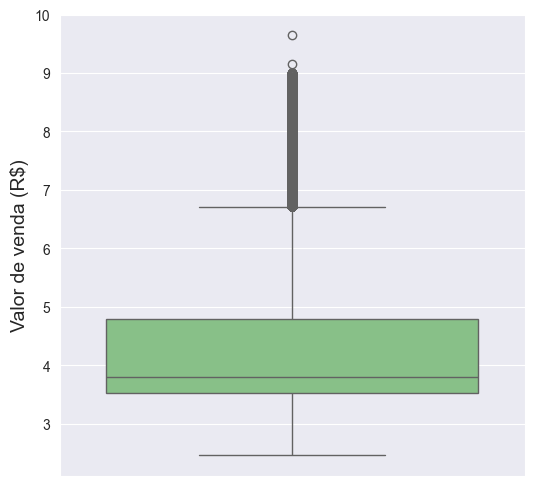

In [35]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', diesel_s10)

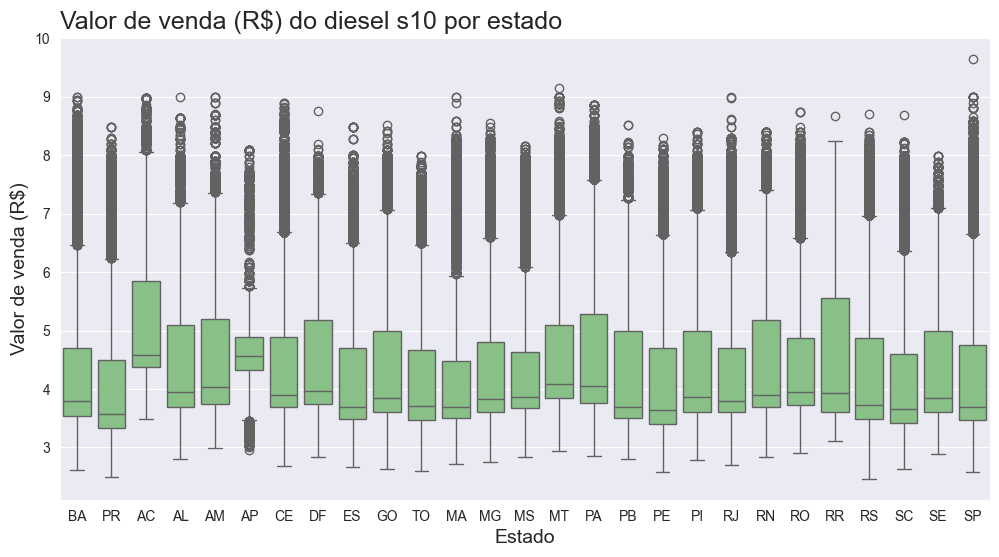

In [36]:
plota_boxplot_2v(
    'Valor de venda (R$) do diesel s10 por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    diesel_s10
)

Diesel comum

In [37]:
print('Diesel comum')
diesel.valor_venda.describe().round(2)

Diesel comum


count    623737.00
mean          4.20
std           1.23
min           2.45
25%           3.40
50%           3.68
75%           4.52
max           9.00
Name: valor_venda, dtype: float64

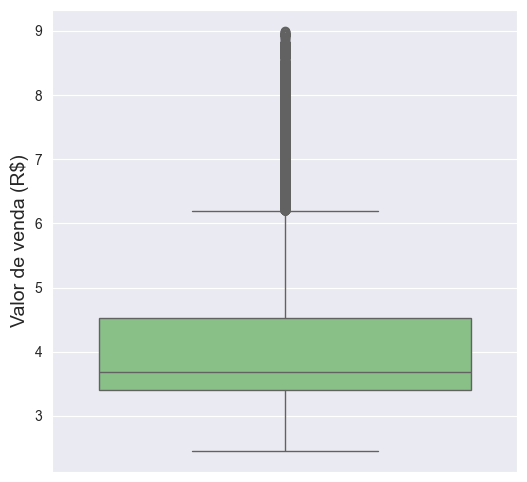

In [38]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', diesel)

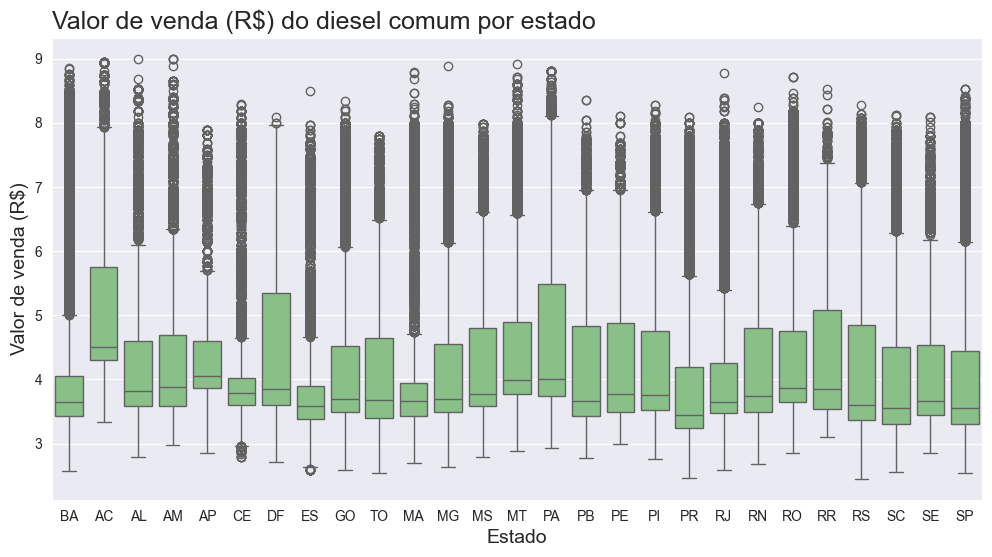

In [39]:
plota_boxplot_2v(
    'Valor de venda (R$) do diesel comum por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    diesel
)

Etanol

In [40]:
print('Etanol')
etanol.valor_venda.describe().round(2)

Etanol


count    1105096.00
mean           3.72
std            0.99
min            1.80
25%            2.96
50%            3.49
75%            4.30
max            7.98
Name: valor_venda, dtype: float64

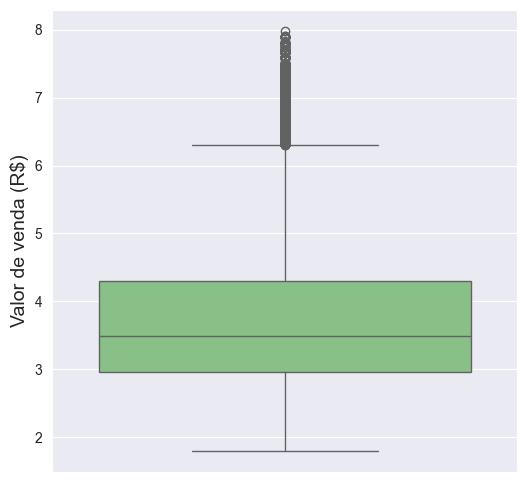

In [41]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', etanol)

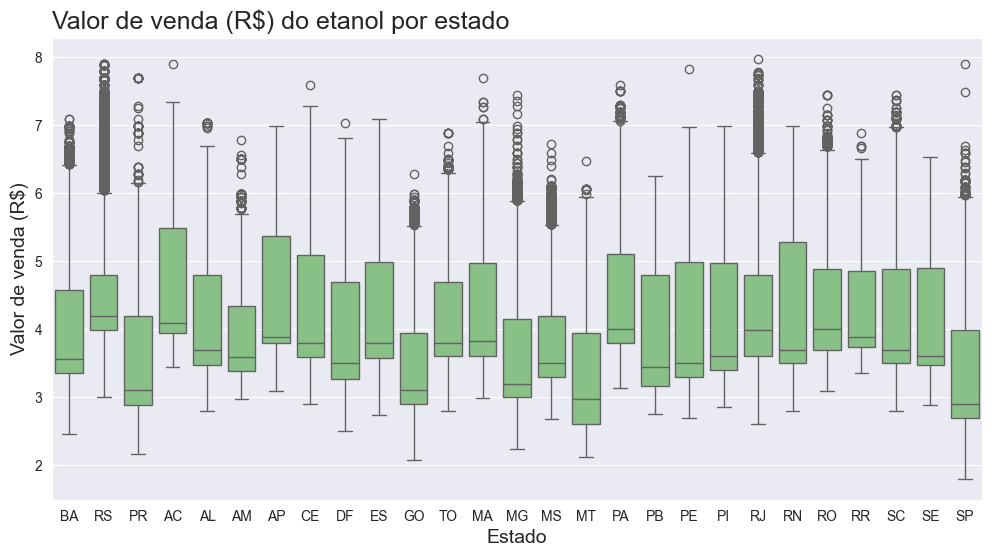

In [42]:
plota_boxplot_2v(
    'Valor de venda (R$) do etanol por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    etanol
)

GNV

In [43]:
print('GNV')
gnv.valor_venda.describe().round(2)

GNV


count    76337.00
mean         3.66
std          0.96
min          1.76
25%          2.99
50%          3.39
75%          4.37
max          7.99
Name: valor_venda, dtype: float64

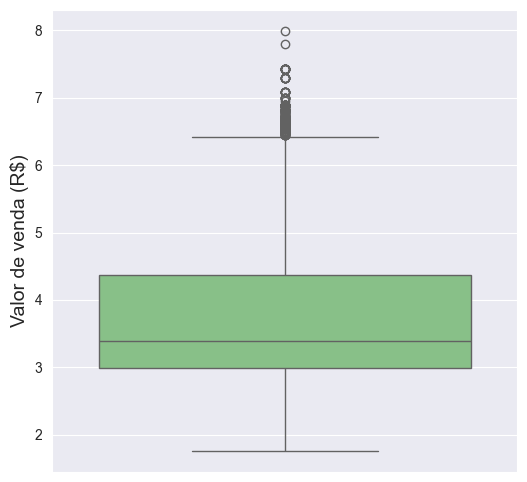

In [44]:
plota_boxplot_geral('Valor de venda (R$)', 'valor_venda', gnv)

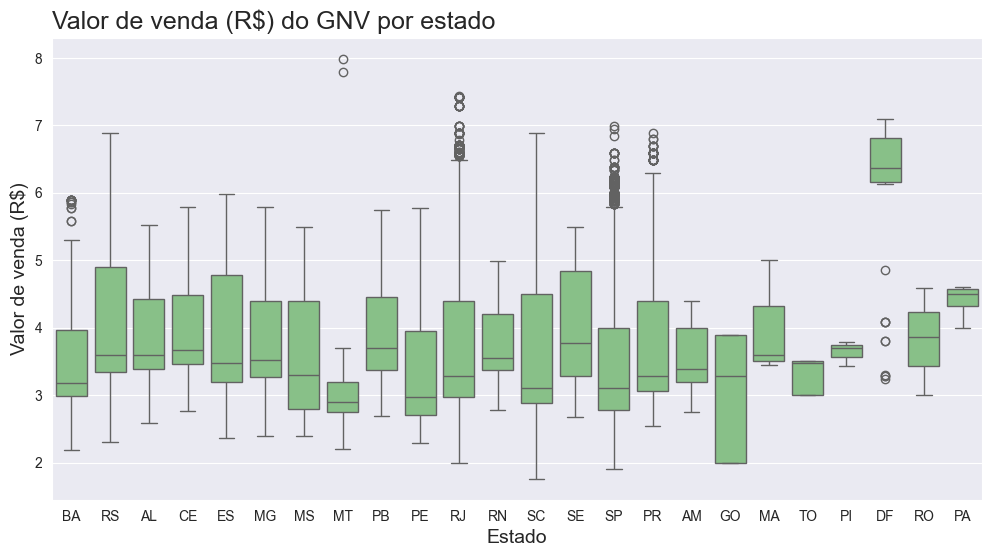

In [45]:
plota_boxplot_2v(
    'Valor de venda (R$) do GNV por estado',
    'Estado',
    'Valor de venda (R$)',
    'estado',
    'valor_venda',
    gnv
)

Quantidade de bandeiras distribuidoras de combustível

In [46]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


In [47]:
df_anp['bandeira'].nunique()

85

In [48]:
df_anp['bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'RODOIL', 'EQUADOR',
       'SABBÁ', 'IPIRANGA', 'RAIZEN', "ATEM' S", 'PETROSERRA', 'ALESAT',
       'HORA', 'PETROBAHIA', 'SP', 'SETTA DISTRIBUIDORA', 'DISLUB',
       'ATLÂNTICA', 'ZEMA', 'RIO BRANCO', 'TDC DISTRIBUIDORA', 'SATELITE',
       'CIAPETRO', 'ALE COMBUSTÍVEIS', 'TAURUS', 'IDAZA', 'PODIUM',
       'WATT', 'SIMARELLI', 'FEDERAL', 'STANG', 'UNI', 'POTENCIAL',
       'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'RAIZEN MIME', 'REJAILE',
       'MAXSUL', 'DIBRAPE', 'RUFF C.J.', 'D`MAIS', 'RM PETROLEO',
       'ROYAL FIC', 'TORRAO', 'RZD DISTRIBUIDORA', 'TEMAPE', 'ACOL',
       'MONTEPETRO', 'FAN', 'TOBRAS', 'PETROX DISTRIBUIDORA', 'PETROX',
       'SOLL', 'PETROLUZ', 'LIQUIGÁS', 'POLIPETRO', 'SUL COMBUSTÍVEIS',
       'PELIKANO', 'SMALL', 'DINAMO', 'BREMEN', 'LARCO',
       'MASUT DISTRIBUIDORA', 'ESTRADA', 'WALENDOWSKY', 'GRAN PETRO',
       'SAARA', 'GP', 'REDE SOL', 'AIR BP', '76 OIL', 'TOTAL BRASIL',
       'PR DISTRIBUIDORA', 'TA

In [49]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()
bandeiras_estado = bandeiras_estado.sort_values('bandeira', ascending=False).reset_index(drop=True)
bandeiras_estado.head()

,estado,bandeira
0,SP,28
1,PR,24
2,MG,19
3,GO,18
4,SC,18


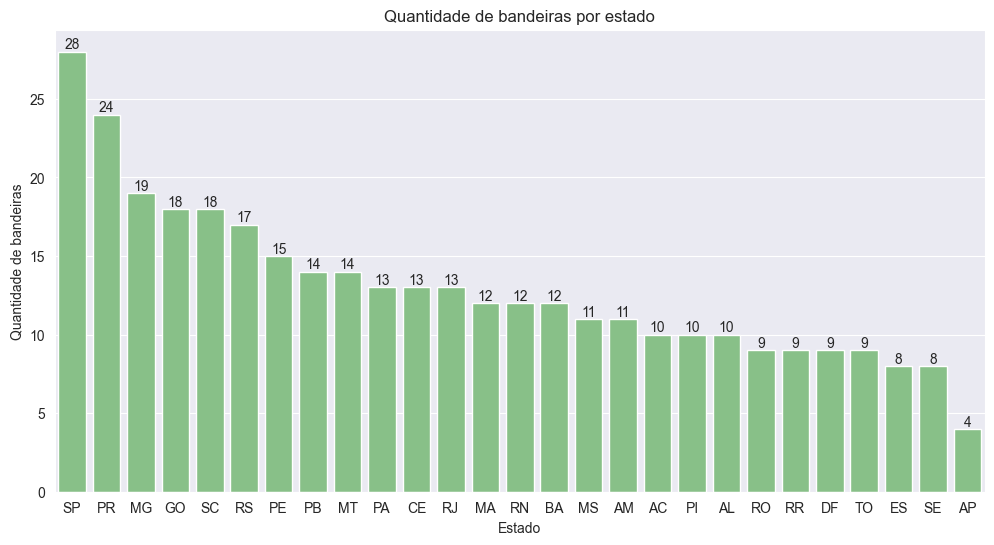

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bandeiras_estado, x='estado', y='bandeira')
plt.title('Quantidade de bandeiras por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()